In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install networkx


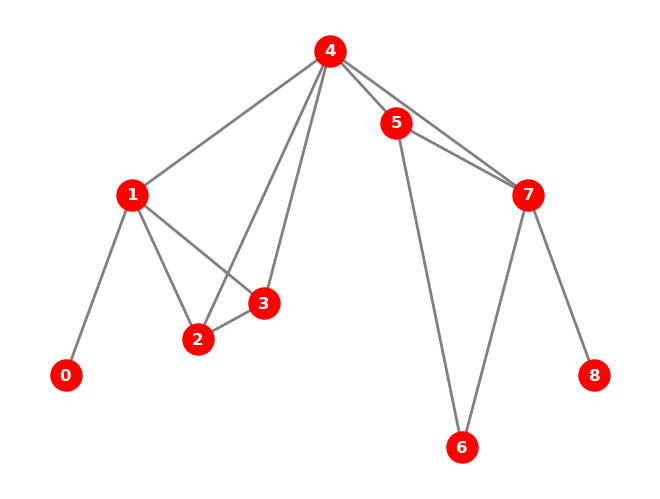

In [8]:
import networkx as nx

def create_visibility_network(time_series):
    G = nx.Graph()
    sorted_series = sorted(time_series, key=lambda x: x[0])

    for i in range(len(sorted_series)):
        G.add_node(i, value=sorted_series[i][1])

    for i in range(len(sorted_series)):
        for j in range(i+1, len(sorted_series)):
            visibility = True
            for k in range(i+1, j):
                if sorted_series[k][1] > sorted_series[i][1] + (sorted_series[j][1] - sorted_series[i][1])*(sorted_series[k][0] - sorted_series[i][0])/(sorted_series[j][0] - sorted_series[i][0]):
                    visibility = False
                    break
            if visibility:
                G.add_edge(i, j)
    return G

time_series = [(1,5),(2,10),(3,6),(4,7),(5,14),(6,12),(7,3),(8,10),(9,5)]
G = create_visibility_network(time_series)
sorted_series = sorted(time_series, key=lambda x: x[0])
# draw the graph
pos = {i: (sorted_series[i][0], sorted_series[i][1]) for i in range(len(sorted_series))}
nx.draw(G, pos, with_labels=True, node_size=500, font_size=12, font_color='white', font_weight='bold', width=2, edge_color='gray', node_color='red')


In [20]:
A = nx.to_numpy_array(G)
A

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.]])